In [1]:
import numpy as np
import pandas as pd

In [3]:
def generate_correlated_gaussian_vectors(mu, R, n_samples=1):
    """
    Генерирует n_samples векторов из многомерного нормального распределения
    с вектором средних mu и матрицей корреляций R.

    Параметры:
    - mu: 1D array (n,) — вектор средних
    - R: 2D array (n, n) — матрица корреляций (симметричная, положительно определённая)
    - n_samples: int — количество векторов для генерации

    Возвращает:
    - X: 2D array (n_samples, n) — массив сгенерированных векторов
    """
    # Проверка симметричности и положительной определённости (опционально)
    assert R.shape[0] == R.shape[1], "Матрица R должна быть квадратной"
    assert R.shape[0] == len(mu), "Размер R и mu должны совпадать"
    
    # Разложение Холецкого: R = L @ L.T
    L = np.linalg.cholesky(R)

    # Генерация стандартных нормальных векторов (n_samples, n)
    Z = np.random.normal(0, 1, size=(n_samples, len(mu)))

    # Преобразование: X = mu + Z @ L.T
    X = mu + Z @ L.T

    return X

In [21]:
import random
import numpy as np

seed = 52
random.seed(seed)

mu = np.array([7,6,7,6,7,8,6,7,8,7])
import numpy as np

sigma = np.array([
    # Q1   Q2   Q3   Q4   Q5   Q6   Q7   Q8   Q9   Q10
    [1.00, 0.45, 0.10, 0.20, 0.60, 0.35, 0.45, 0.15, 0.15, 0.25],  # Q1
    [0.45, 1.00, 0.10, 0.15, 0.40, 0.40, 0.50, 0.10, 0.10, 0.25],  # Q2
    [0.10, 0.10, 1.00, 0.15, 0.10, 0.10, 0.30, 0.55, 0.65, 0.45],  # Q3
    [0.20, 0.15, 0.15, 1.00, 0.20, 0.35, 0.15, 0.20, 0.20, 0.40],  # Q4
    [0.60, 0.40, 0.10, 0.20, 1.00, 0.35, 0.50, 0.10, 0.10, 0.20],  # Q5
    [0.35, 0.40, 0.10, 0.35, 0.35, 1.00, 0.25, 0.15, 0.15, 0.50],  # Q6
    [0.45, 0.50, 0.30, 0.15, 0.50, 0.25, 1.00, 0.20, 0.20, 0.45],  # Q7
    [0.15, 0.10, 0.55, 0.20, 0.10, 0.15, 0.20, 1.00, 0.60, 0.45],  # Q8
    [0.15, 0.10, 0.65, 0.20, 0.10, 0.15, 0.20, 0.60, 1.00, 0.50],  # Q9
    [0.25, 0.25, 0.45, 0.40, 0.20, 0.50, 0.45, 0.45, 0.50, 1.00]   # Q10
])
# mu = np.array([1,2])
# sigma = np.array([
#     [1,0.2],
#     [0.2, 1.0]
# ])


data = generate_correlated_gaussian_vectors(mu, sigma, n_samples=150)

(array([ 7.,  9., 18., 29., 31., 25., 14., 14.,  1.,  2.]),
 array([4.52524597, 5.05463063, 5.58401528, 6.11339993, 6.64278459,
        7.17216924, 7.70155389, 8.23093855, 8.7603232 , 9.28970786,
        9.81909251]),
 <BarContainer object of 10 artists>)

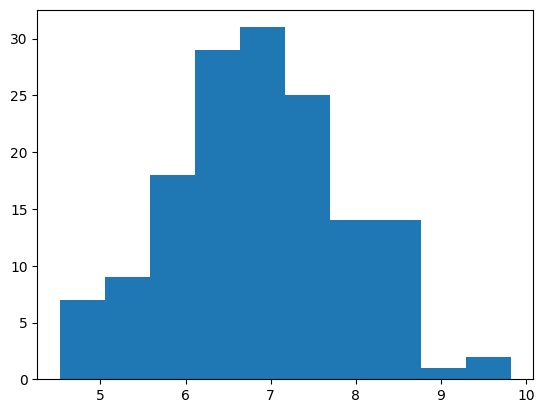

In [22]:
import matplotlib.pyplot as plt
plt.hist(data[:, 0])

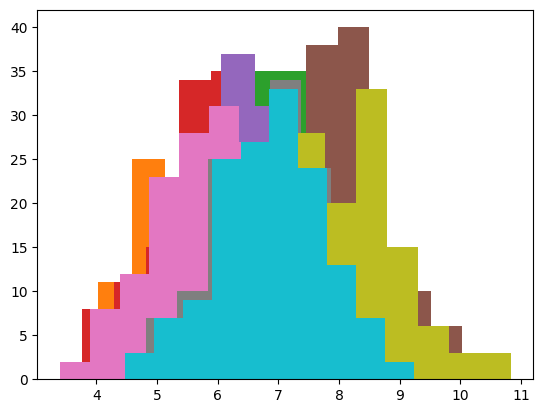

In [24]:
for i in range(0, 10):
    plt.hist(data[:, i])

In [61]:
df = pd.read_csv('generated_sample.csv')
df['y'] = pd.Series([2]*100 + [0]*100 + [1] * 100)

(array([ 1.,  0.,  0.,  0.,  0., 14.,  0., 34., 37., 15.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

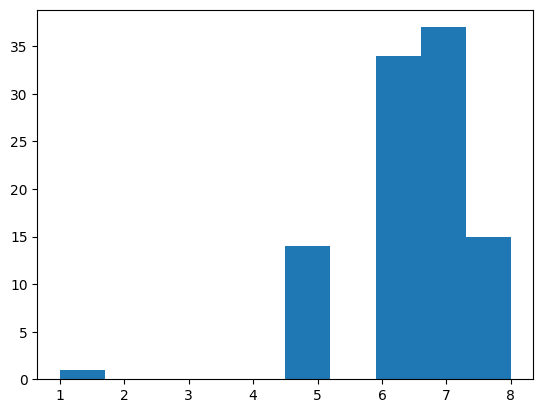

In [67]:
# for i in range(0, 10):
#     plt.hist(df.loc[i].values)
plt.hist(df.loc[:100, '0'])

In [92]:
def naive_model(x, bounds=[10, 32, 33, 60, 61, 100]):
    """
    Применяет модель к массиву данных.
    x: numpy array или pandas DataFrame с формой (n_samples, n_features).
        Каждая строка суммируется для получения оценки.
    bounds: list из 6 значений [min_0, max_0, min_1, max_1, min_2, max_2],
        определяет диапазоны для классов 0, 1, 2 соответственно.
    
    Возвращает:
        numpy array с предсказаниями (0, 1 или 2) для каждой строки x.
    """
    # Суммируем по строкам (axis=1), получаем массив оценок
    scores = x.sum(axis=1)
    
    # Векторизованная логика классификации
    # Используем numpy.where для условной логики
    # Сначала проверяем класс 0, затем 1, затем 2, иначе ошибка
    conditions = [
        (bounds[0] <= scores) & (scores <= bounds[1]),  # Класс 0
        (bounds[2] <= scores) & (scores <= bounds[3]),  # Класс 1
        (bounds[4] <= scores) & (scores <= bounds[5])   # Класс 2
    ]
    choices = [0, 1, 2]
    
    # Применяем условия
    result = np.select(conditions, choices, default=-1)  # -1 для значений вне диапазонов
    
    # Проверяем, были ли значения вне диапазонов
    if (result == -1).any():
        raise ValueError('Score на тесте больше(меньше), чем max=100(min=10)')
    
    return result

In [55]:
df['y'].values

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [93]:
naive_model(df.values)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1])

In [94]:
from sklearn.metrics import confusion_matrix, f1_score

print(confusion_matrix(y_pred=naive_model(df.values), y_true = df['y']))
print(f1_score(y_pred=naive_model(df.values), y_true = df['y'], average='macro'))

[[92  8  0]
 [41 59  0]
 [ 0  4 96]]
0.8197832956941028


In [96]:
df

,0,1,2,3,4,5,6,7,8,9,y
0,6,7,8,8,8,9,6,7,8,7,2
1,6,7,6,9,7,7,5,7,6,6,2
2,5,7,6,7,7,8,6,6,7,7,2
3,7,9,6,6,7,7,6,6,7,5,2
4,6,8,5,5,7,7,7,7,7,6,2
...,...,...,...,...,...,...,...,...,...,...,...
295,4,7,5,3,3,6,2,2,1,3,1
296,2,5,4,4,0,5,0,3,2,4,1
297,5,6,3,4,2,5,2,1,0,3,1
298,3,5,3,3,1,6,0,3,1,2,1


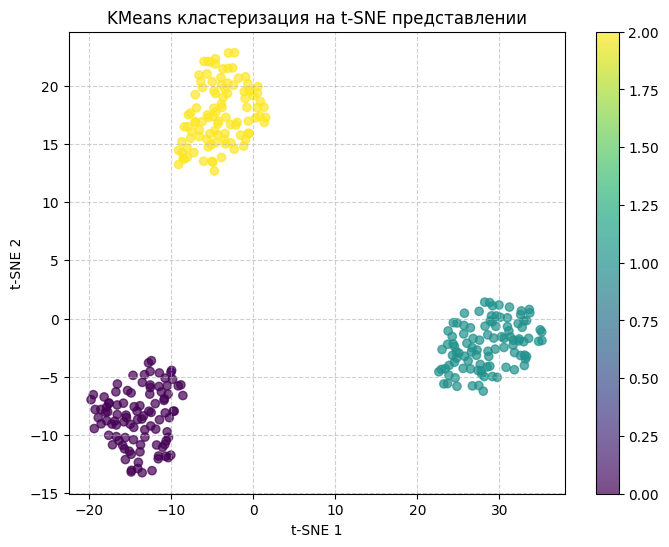

Центры кластеров в t-SNE пространстве:
[[-13.902695   -8.477194 ]
 [ 28.624306   -2.272221 ]
 [ -4.0686293  17.582901 ]]


In [103]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Применим t-SNE для снижения размерности до 2D
x = df.drop('y', axis=1)
tsne = TSNE(n_components=2, random_state=42)
x_tsne = tsne.fit_transform(x)

# Создаём датафрейм с координатами t-SNE
df_tsne = pd.DataFrame(x_tsne, columns=['x', 'y'])

# Применим KMeans к 2D данным t-SNE
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(df_tsne)

# Добавим метки кластеров в датафрейм
df_tsne['cluster'] = cluster_labels

# Построим график кластеров
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_tsne['x'], df_tsne['y'], c=df_tsne['cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter)
plt.title('KMeans кластеризация на t-SNE представлении')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Центры кластеров в 2D пространстве t-SNE
print("Центры кластеров в t-SNE пространстве:")
print(kmeans.cluster_centers_)

In [105]:
from sklearn.metrics import adjusted_rand_score
ari_score = adjusted_rand_score(df['y'], cluster_labels)
print(f"Adjusted Rand Index: {ari_score:.3f}")

Adjusted Rand Index: 1.000


Text(0.5, 1.0, 't-SNE визуализация кластеров KMeans')

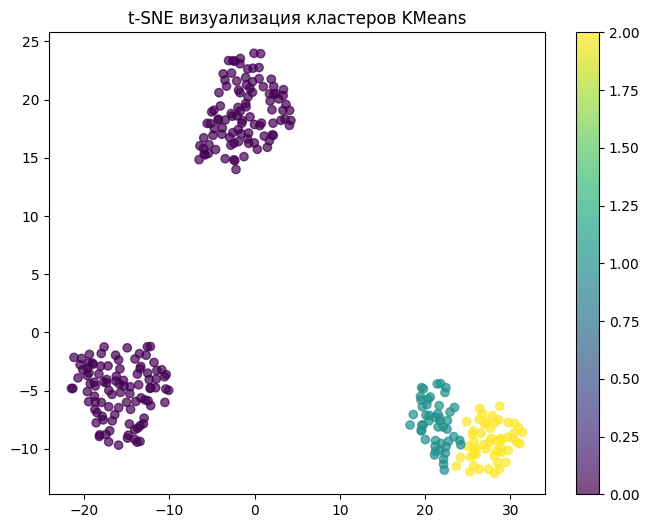

In [99]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
x_tsne = tsne.fit_transform(df)

# Создаём датафрейм с координатами t-SNE
df_viz = pd.DataFrame(x_tsne, columns=['x', 'y'])
df_viz['cluster'] = cluster_labels

# Строим график
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_viz['x'], df_viz['y'], c=df_viz['cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter)
plt.title('t-SNE визуализация кластеров KMeans')

In [22]:
from abc import ABC, abstractmethod
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import  PCA

class Model(ABC):
    """Базовый класс модели"""
    
    @abstractmethod
    def fit(self, x, y=None):
        """Обучение модели"""
        pass

    @abstractmethod
    def predict(self, x):
        """Предсказание модели"""
        pass

class NaiveModel(Model):
    """Наивная модель на основе суммы признаков и порогов"""
    
    def __init__(self, bounds=[10, 32, 33, 60, 61, 100]):
        self.bounds = bounds

    def fit(self, x, y=None):
        """Для наивной модели fit не требуется"""
        return self

    def predict(self, x):
        """
        Применяет модель к массиву данных.
        x: numpy array или pandas DataFrame с формой (n_samples, n_features).
            Каждая строка суммируется для получения оценки.
        bounds: list из 6 значений [min_0, max_0, min_1, max_1, min_2, max_2],
            определяет диапазоны для классов 0, 1, 2 соответственно.

        Возвращает:
            numpy array с предсказаниями (0, 1 или 2) для каждой строки x.
        """
        scores = x.sum(axis=1)

        conditions = [
            (self.bounds[0] <= scores) & (scores <= self.bounds[1]),  # Класс 0
            (self.bounds[2] <= scores) & (scores <= self.bounds[3]),  # Класс 1
            (self.bounds[4] <= scores) & (scores <= self.bounds[5])   # Класс 2
        ]
        choices = [0, 1, 2]

        # Применяем условия
        result = np.select(conditions, choices, default=-1)  # -1 для значений вне диапазонов

        # Проверяем, были ли значения вне диапазонов
        if (result == -1).any():
            raise ValueError('Score на тесте больше(меньше), чем max=100(min=10)')

        return result

class KMeansModel(Model):
    """Модель кластеризации KMeans с предварительным t-SNE"""
    def __init__(self, n_clusters=3, random_state=42, n_tsne = 2):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.pca = PCA(n_components=n_tsne, random_state=random_state)
        
        self.kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
        # self.scaler = StandardScaler()
        

    def fit(self, x, y=None):
        x = self.pca.fit_transform(x)
        self.kmeans.fit(x)
        return self

    def predict(self, x):
        x = self.pca.transform(x)  # замечание: t-SNE не умеет трансформировать новые точки напрямую
        
        cluster_labels = self.kmeans.predict(x)
        return cluster_labels


In [23]:
df = pd.read_csv('generated_sample.csv')
df['y'] = pd.Series([2]*100 + [0]*100 + [1] * 100)
df

,0,1,2,3,4,5,6,7,8,9,y
0,6,7,8,8,8,9,6,7,8,7,2
1,6,7,6,9,7,7,5,7,6,6,2
2,5,7,6,7,7,8,6,6,7,7,2
3,7,9,6,6,7,7,6,6,7,5,2
4,6,8,5,5,7,7,7,7,7,6,2
...,...,...,...,...,...,...,...,...,...,...,...
295,4,7,5,3,3,6,2,2,1,3,1
296,2,5,4,4,0,5,0,3,2,4,1
297,5,6,3,4,2,5,2,1,0,3,1
298,3,5,3,3,1,6,0,3,1,2,1


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, silhouette_score, adjusted_rand_score


X_train, X_test, y_train, y_test = train_test_split(df.drop('y', axis=1), df['y'], shuffle=True)

In [20]:
tsne = TSNE(n_components=2, random_state=52)
kmeans = KMeans(n_clusters=3, random_state=52)


X_train = tsne.fit_transform(X_train)
X_test  = tsne.transform(X_test)

AttributeError: 'TSNE' object has no attribute 'transform'

In [26]:
kmeans = KMeansModel()

res = kmeans.fit(X_train)
y_pred = kmeans.predict(X_train)


print("_______________TRAIN_________________")
print(adjusted_rand_score(y_train, y_pred))
print(silhouette_score(X_train, y_pred))
print()

print("_______________TEST__________________")
print(adjusted_rand_score(y_test, kmeans.predict(X_test)))
print(silhouette_score(X_test, y_test))


_______________TRAIN_________________
1.0
0.47115279407183047

_______________TEST__________________
1.0
0.47356479522087463


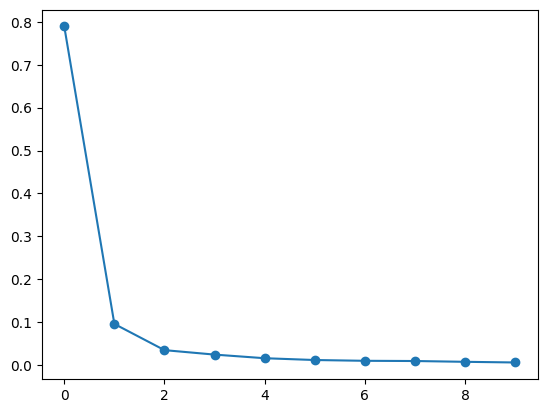

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=10)
pca.fit_transform(X_train)



plt.plot(pca.explained_variance_ratio_, marker='o')